In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#df = pd.read_excel('../Date_Fruit_Datasets.xlsx')
#df = pd.read_excel('../Date_Fruit_Datasets.xlsx')
df = pd.read_csv('../WineQT.csv')
df = df.drop(columns=['Id'])

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
#Boxplot of numerical features
#countplot of the target
#correlation matrix of the features and the target

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px

numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Perform Min-Max Scaling
standard_scaler = StandardScaler()
scaled_numerical_df_standard = standard_scaler.fit_transform(numerical_df)


scaled_numerical_df_standard = pd.DataFrame(scaled_numerical_df_standard, columns=numerical_df.columns)
# Create the horizontal box plot using Plotly Express
fig = px.box(scaled_numerical_df_standard, 
             orientation='h',
             title='Horizontal Box Plot of Multiple Numerical Columns',
             labels={'variable': 'Numerical Features', 'value': 'Value'})

# Show the plot

max_value_xaxis = 5  # Set the maximum value as per your requirement
fig.update_xaxes(range=[-max_value_xaxis, max_value_xaxis])
fig.update_layout(width=1000, height=1000)
fig.show()


In [30]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your pandas DataFrame

# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Plot count plot for each categorical column
for column in categorical_columns:
    fig = px.bar(df[column].value_counts(), x=df[column].value_counts().index, y=df[column].value_counts().values)
    fig.update_layout(title_text=f"Count Plot of {column}", xaxis_title=column, yaxis_title="Count")
    fig.update_layout(width=800, height=600)
    fig.update_yaxes(range=[50, 220])
    fig.show()


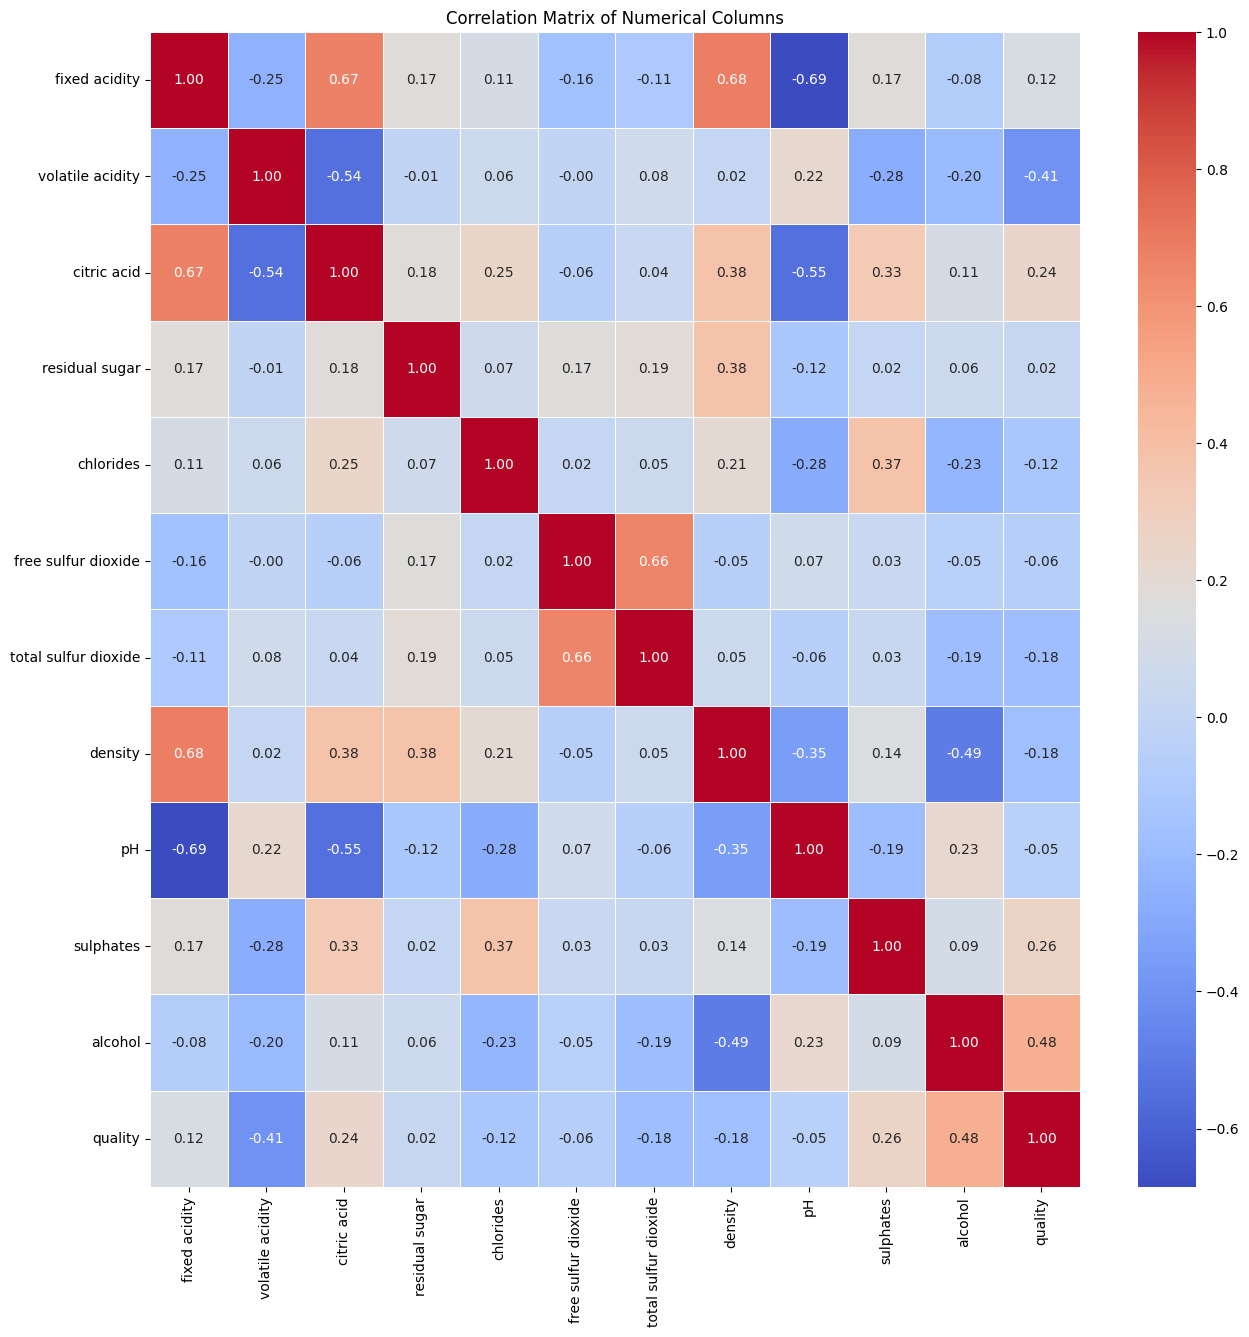

In [33]:
import seaborn as sns
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')

plt.show()
